In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows
# matplotlib.rcParmas['font.family'] = 'AppleGothic' # mac
matplotlib.rcParams['font.size'] = 15 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글폰트 사용시 마이너스 글자가 깨지는 현상을 해결

In [84]:
df = pd.read_csv('D:/linux_report.csv')
df
dp = pd.read_csv('D:/openstack_report.csv')
dp

,구분,진단코드,진단항목,취약도,점검결과
0,보안설정,OT-30,Identity 서비스 max_request_body_size 설정,상,양호
1,보안설정,OT-32,Dashboard의 DISALLOW_IFRAME_EMBED 설정,상,NaN
2,보안설정,OT-33,Dashboard의 CSFR_COOKIE_SECURE 설정,상,NaN
3,보안설정,OT-34,Dashboard의 SESSION_COOKIE_SECURE 설정,상,NaN
4,보안설정,OT-35,Dashboard의 SESSION_COOKIE_HTTPONLY 설정,상,NaN
5,보안설정,OT-36,Dashboard의 PASSWORD_AUTOCOMPLE 설정,상,NaN
6,보안설정,OT-37,Dashboard의 DISABLE_PASSWORD_REVEAL 설정,상,NaN
7,보안설정,OT-38,Dashboard의 ENFORCE_PASSWORD_CHECK 설정,상,NaN
8,보안설정,OT-39,Dashboard의 PASSWORD_VALIDATOR 설정,상,NaN
9,보안설정,OT-40,Compute의 인증을 위한 keystone 사용,상,취약


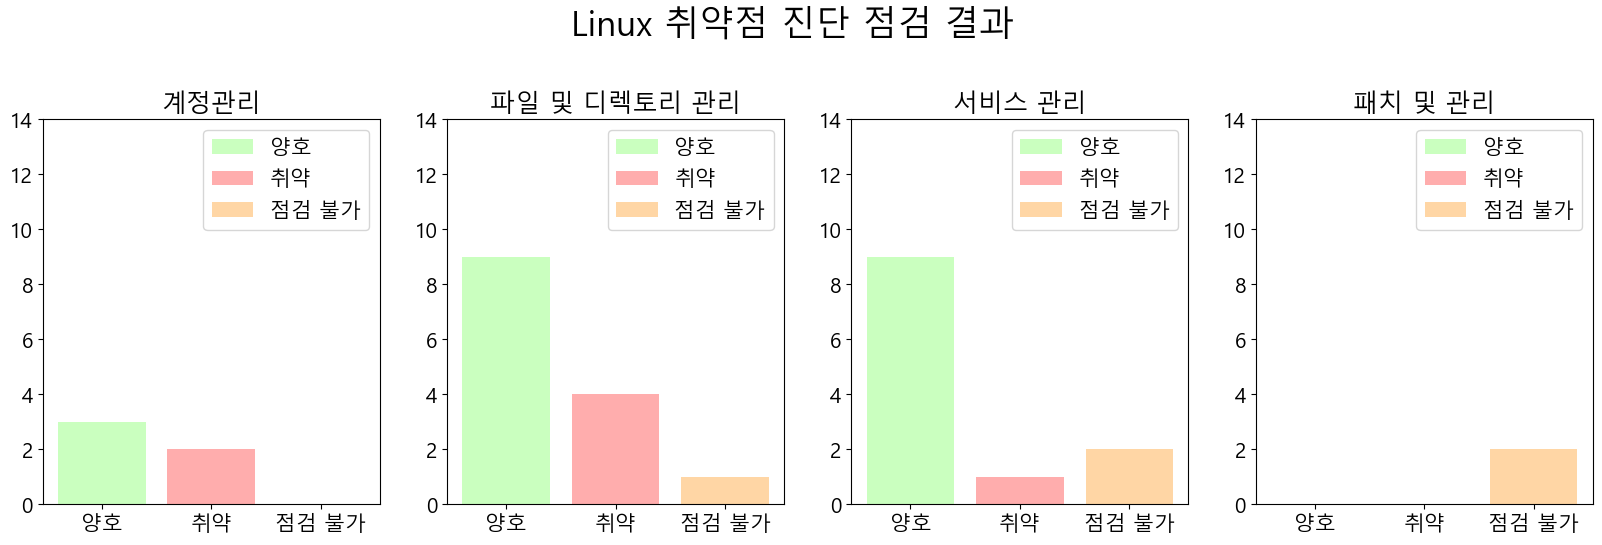

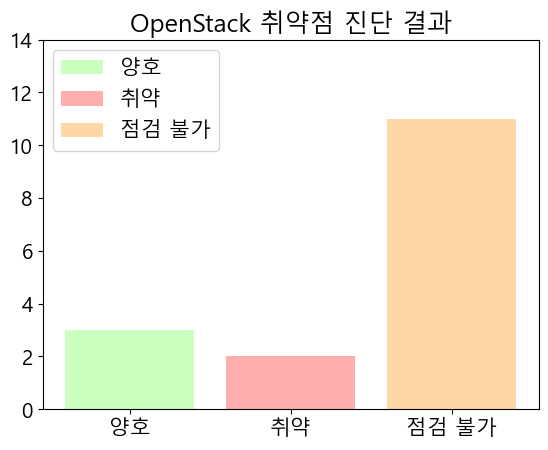

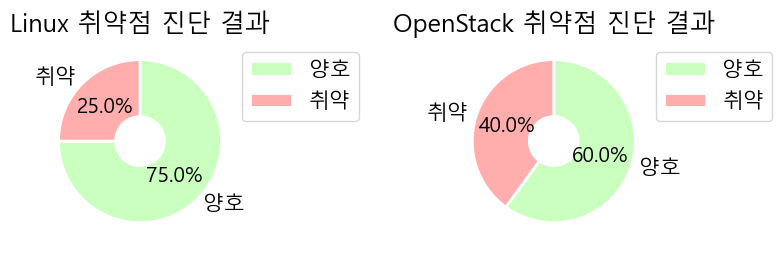

In [45]:
import matplotlib.pyplot as plt
df.fillna('점검 불가', inplace=True)
# 색상 설정
colors = ['#caffbf', '#ffadad', '#ffd6a5']

labels= ['양호', '취약', '점검 불가']

# 계정관리 항목의 점검결과 계산
result1 = df[df['구분'] == '계정관리']['점검결과'].value_counts()
result1 = result1.reindex(['양호', '취약', '점검 불가'], fill_value=0)



# 파일 및 디렉토리 관리 항목의 점검결과 계산
result2 = df[df['구분'] == '파일 및 디렉토리 관리']['점검결과'].value_counts()
result2 = result2.reindex(['양호', '취약', '점검 불가'], fill_value=0)

# 서비스 관리 계산
result3 = df[df['구분'] == '서비스 관리']['점검결과'].value_counts()
result3 = result3.reindex(['양호', '취약', '점검 불가'], fill_value=0)

# 패치 및 로그 관리 계산
result4 = df[df['구분'] == '패치 및 로그관리']['점검결과'].value_counts()
result4 = result4.reindex(['양호', '취약', '점검 불가'], fill_value=0)


# 막대그래프 그리기
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].bar(result1.index, result1.values , color=colors , label=labels)
ax[0].set_title('계정관리')
ax[0].set_ylim([0,14])

ax[1].bar(result2.index, result2.values , color=colors , label=labels)
ax[1].set_title('파일 및 디렉토리 관리')
ax[1].set_ylim([0,14])


ax[2].bar(result3.index, result3.values , color=colors , label=labels)
ax[2].set_title('서비스 관리')
ax[2].set_ylim([0,14])

ax[3].bar(result4.index, result4.values , color=colors , label=labels)
ax[3].set_title('패치 및 관리')
ax[3].set_ylim([0,14])


ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

plt.suptitle('Linux 취약점 진단 점검 결과', fontsize=25, y=1.1)
plt.show()


dp.fillna('점검 불가', inplace=True)
# 색상 설정
colors = ['#caffbf', '#ffadad', '#ffd6a5']

labels= ['양호', '취약', '점검 불가']


op_result = dp[dp['구분'] == '보안설정']['점검결과'].value_counts()
op_result = op_result.reindex(['양호', '취약', '점검 불가'], fill_value=0)
plt.bar(op_result.index , op_result.values, color=colors , label=labels)
plt.ylim([0,14])

plt.title('OpenStack 취약점 진단 결과')
plt.legend()
plt.show()
#-------------------------------------------------------- 원 그래프 -----------------------------------

# subplot 생성
fig, (ax1, ax2) = plt.subplots(1, 2)

# 첫 번째 subplot에 그래프 그리기
result1 = df[df['점검결과'] == '양호']['점검결과'].count()
result2 = df[df['점검결과'] == '취약']['점검결과'].count()
colors = ['#caffbf', '#ffadad']
values = [result1, result2]
labels = ['양호', '취약']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
ax1.pie(values, labels=labels, autopct='%.1f%%', counterclock=False, colors=colors, startangle=90, wedgeprops=wedgeprops ,pctdistance=0.6)
ax1.set_title('Linux 취약점 진단 결과')
ax1.legend(loc=(1, 0.6))

# 두 번째 subplot에 그래프 그리기
op_good = dp[dp['점검결과'] == '양호']['점검결과'].count()
op_bad = dp[dp['점검결과'] == '취약']['점검결과'].count()
colors = ['#caffbf', '#ffadad']
values = [op_good, op_bad]
labels = ['양호', '취약']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
ax2.pie(values, labels=labels, autopct='%.1f%%', counterclock=False, colors=colors, startangle=90, wedgeprops=wedgeprops,pctdistance=0.6)
ax2.set_title('OpenStack 취약점 진단 결과')
ax2.legend(loc=(1, 0.6))

# subplot 간의 간격 조정
plt.tight_layout()
plt.subplots_adjust(right=1)
# 출력
plt.show()


# pdf로 변환

In [46]:
from matplotlib.backends.backend_pdf import PdfPages


with PdfPages('연습.pdf') as pdf:
        
    df.fillna('점검 불가', inplace=True)
# 색상 설정
    colors = ['#caffbf', '#ffadad', '#ffd6a5']

    labels= ['양호', '취약', '점검 불가']

# 계정관리 항목의 점검결과 계산
    result1 = df[df['구분'] == '계정관리']['점검결과'].value_counts()
    result1 = result1.reindex(['양호', '취약', '점검 불가'], fill_value=0)



# 파일 및 디렉토리 관리 항목의 점검결과 계산
    result2 = df[df['구분'] == '파일 및 디렉토리 관리']['점검결과'].value_counts()
    result2 = result2.reindex(['양호', '취약', '점검 불가'], fill_value=0)

# 서비스 관리 계산
    result3 = df[df['구분'] == '서비스 관리']['점검결과'].value_counts()
    result3 = result3.reindex(['양호', '취약', '점검 불가'], fill_value=0)

# 패치 및 로그 관리 계산
    result4 = df[df['구분'] == '패치 및 로그관리']['점검결과'].value_counts()
    result4 = result4.reindex(['양호', '취약', '점검 불가'], fill_value=0)


# 막대그래프 그리기
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].bar(result1.index, result1.values , color=colors , label=labels)
    ax[0].set_title('계정관리')
    ax[0].set_ylim([0,14])

    ax[1].bar(result2.index, result2.values , color=colors , label=labels)
    ax[1].set_title('파일 및 디렉토리 관리')
    ax[1].set_ylim([0,14])


    ax[2].bar(result3.index, result3.values , color=colors , label=labels)
    ax[2].set_title('서비스 관리')
    ax[2].set_ylim([0,14])

    ax[3].bar(result4.index, result4.values , color=colors , label=labels)
    ax[3].set_title('패치 및 관리')
    ax[3].set_ylim([0,14])


    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    ax[3].legend()

    plt.suptitle('Linux 취약점 진단 점검 결과', fontsize=25, y=1.1)
    # 그래프를 PDF 파일에 저장
    pdf.savefig()
    
    # 그래프 초기화
    plt.clf()

    dp.fillna('점검 불가', inplace=True)
# 색상 설정
    colors = ['#caffbf', '#ffadad', '#ffd6a5']

    labels= ['양호', '취약', '점검 불가']


    op_result = dp[dp['구분'] == '보안설정']['점검결과'].value_counts()
    op_result = op_result.reindex(['양호', '취약', '점검 불가'], fill_value=0)
    plt.bar(op_result.index , op_result.values, color=colors , label=labels)
    plt.ylim([0,14])

    plt.title('OpenStack 취약점 진단 결과')
    plt.legend()
    # 그래프를 PDF 파일에 저장
    pdf.savefig()
    
    # 그래프 초기화
    plt.clf()
#-------------------------------------------------------- 원 그래프 -----------------------------------

# subplot 생성
    fig, (ax1, ax2) = plt.subplots(1, 2)

# 첫 번째 subplot에 그래프 그리기
    result1 = df[df['점검결과'] == '양호']['점검결과'].count()
    result2 = df[df['점검결과'] == '취약']['점검결과'].count()
    colors = ['#caffbf', '#ffadad']
    values = [result1, result2]
    labels = ['양호', '취약']
    wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
    ax1.pie(values, labels=labels, autopct='%.1f%%', counterclock=False, colors=colors, startangle=90, wedgeprops=wedgeprops ,pctdistance=0.6)
    ax1.set_title('Linux 취약점 진단 결과')
    ax1.legend(loc=(1, 0.6))

# 두 번째 subplot에 그래프 그리기
    op_good = dp[dp['점검결과'] == '양호']['점검결과'].count()
    op_bad = dp[dp['점검결과'] == '취약']['점검결과'].count()
    colors = ['#caffbf', '#ffadad']
    values = [op_good, op_bad]
    labels = ['양호', '취약']
    wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
    ax2.pie(values, labels=labels, autopct='%.1f%%', counterclock=False, colors=colors, startangle=90, wedgeprops=wedgeprops,pctdistance=0.6)
    ax2.set_title('OpenStack 취약점 진단 결과')
    ax2.legend(loc=(1, 0.6))

# subplot 간의 간격 조정
    plt.tight_layout()
    plt.subplots_adjust(right=1)
# 출력
     # 그래프를 PDF 파일에 저장
    pdf.savefig()
    
    # 그래프 초기화
    plt.clf()


<Figure size 2000x500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# 연습장

In [ ]:
result1 = df[df['점검결과'] == '양호']['점검결과'].count()
result2 = df[df['점검결과'] == '취약']['점검결과'].count()
#result3 = df[df['점검결과'] == '점검 불가']['점검결과'].count()
colors = ['#caffbf' , '#ffadad']


values=[result1,result2 ]
labels = ['양호' , '취약']
wedgeprops={'width': 0.6 , 'edgecolor' :'w' , 'linewidth':2}

plt.title('Linux 취약점 진단 결과')
plt.pie(values , labels=labels , autopct='%.1f%%' ,  counterclock=False , colors=colors ,startangle=90 , wedgeprops=wedgeprops)
plt.legend(loc=(1,0.3))
plt.show()

op_good = dp[dp['점검결과'] == '양호']['점검결과'].count()
op_bad = dp[dp['점검결과'] == '취약']['점검결과'].count()

colors = ['#caffbf' , '#ffadad']

values=[op_good, op_bad ]
labels = ['양호' , '취약']
wedgeprops={'width': 0.6 , 'edgecolor' :'w' , 'linewidth':2}

plt.title('OpenStack 취약점 진단 결과')
plt.pie(values , labels=labels , autopct='%.1f%%' ,  counterclock=False , colors=colors ,startangle=90 , wedgeprops=wedgeprops)
plt.legend(loc=(1,0.7))

plt.show()

In [54]:
from matplotlib.backends.backend_pdf import PdfPages


with PdfPages('연습1.pdf') as pdf:
        
    df.fillna('점검 불가', inplace=True)
# 색상 설정
    colors = ['#caffbf', '#ffadad', '#ffd6a5']

    labels= ['양호', '취약', '점검 불가']

# 계정관리 항목의 점검결과 계산
    result1 = df[df['구분'] == '계정관리']['점검결과'].value_counts()
    result1 = result1.reindex(['양호', '취약', '점검 불가'], fill_value=0)



# 파일 및 디렉토리 관리 항목의 점검결과 계산
    result2 = df[df['구분'] == '파일 및 디렉토리 관리']['점검결과'].value_counts()
    result2 = result2.reindex(['양호', '취약', '점검 불가'], fill_value=0)

# 서비스 관리 계산
    result3 = df[df['구분'] == '서비스 관리']['점검결과'].value_counts()
    result3 = result3.reindex(['양호', '취약', '점검 불가'], fill_value=0)

# 패치 및 로그 관리 계산
    result4 = df[df['구분'] == '패치 및 로그관리']['점검결과'].value_counts()
    result4 = result4.reindex(['양호', '취약', '점검 불가'], fill_value=0)


# 막대그래프 그리기
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].bar(result1.index, result1.values , color=colors , label=labels)
    ax[0].set_title('계정관리')
    ax[0].set_ylim([0,14])

    ax[1].bar(result2.index, result2.values , color=colors , label=labels)
    ax[1].set_title('파일 및 디렉토리 관리')
    ax[1].set_ylim([0,14])


    ax[2].bar(result3.index, result3.values , color=colors , label=labels)
    ax[2].set_title('서비스 관리')
    ax[2].set_ylim([0,14])

    ax[3].bar(result4.index, result4.values , color=colors , label=labels)
    ax[3].set_title('패치 및 관리')
    ax[3].set_ylim([0,14])


    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    ax[3].legend()

    fig.suptitle('Linux 취약점 진단 점검 결과', fontsize=25, y=1.1)
    # 그래프를 PDF 파일에 저장
    pdf.savefig()
    
    # 그래프 초기화
    plt.clf()

#--------------------------------------------------------오픈스택 막대 그래프    
    fig, bx = plt.subplots(1, 4, figsize=(20, 5))
    dp.fillna('점검 불가', inplace=True)
# 색상 설정
    colors = ['#caffbf', '#ffadad', '#ffd6a5']

    labels= ['양호', '취약', '점검 불가']

    
    op_result = dp[dp['구분'] == '보안설정']['점검결과'].value_counts()
    op_result = op_result.reindex(['양호', '취약', '점검 불가'], fill_value=0)
    
    

    
    bx[0].bar(op_result.index , op_result.values, color=colors , label=labels)
    bx[0].set_title('OpenStack 취약점 진단 결과')
    bx[0].set_ylim([0,14])

    
    plt.legend()
    # 그래프를 PDF 파일에 저장
    pdf.savefig()
    
    # 그래프 초기화
    plt.clf()
#-------------------------------------------------------- 원 그래프 -----------------------------------

# subplot 생성
    fig, (ax1, ax2) = plt.subplots(1, 2)

# 첫 번째 subplot에 그래프 그리기
    result1 = df[df['점검결과'] == '양호']['점검결과'].count()
    result2 = df[df['점검결과'] == '취약']['점검결과'].count()
    colors = ['#caffbf', '#ffadad']
    values = [result1, result2]
    labels = ['양호', '취약']
    wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
    ax1.pie(values, labels=labels, autopct='%.1f%%', counterclock=False, colors=colors, startangle=90, wedgeprops=wedgeprops ,pctdistance=0.6)
    ax1.set_title('Linux 취약점 진단 결과')
    ax1.legend(loc=(1, 0.6))

# 두 번째 subplot에 그래프 그리기
    op_good = dp[dp['점검결과'] == '양호']['점검결과'].count()
    op_bad = dp[dp['점검결과'] == '취약']['점검결과'].count()
    colors = ['#caffbf', '#ffadad']
    values = [op_good, op_bad]
    labels = ['양호', '취약']
    wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
    ax2.pie(values, labels=labels, autopct='%.1f%%', counterclock=False, colors=colors, startangle=90, wedgeprops=wedgeprops,pctdistance=0.6)
    ax2.set_title('OpenStack 취약점 진단 결과')
    ax2.legend(loc=(1, 0.6))

# subplot 간의 간격 조정
    plt.tight_layout()
    plt.subplots_adjust(right=1)
# 출력
     # 그래프를 PDF 파일에 저장
    pdf.savefig()
    
    # 그래프 초기화
    plt.clf()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

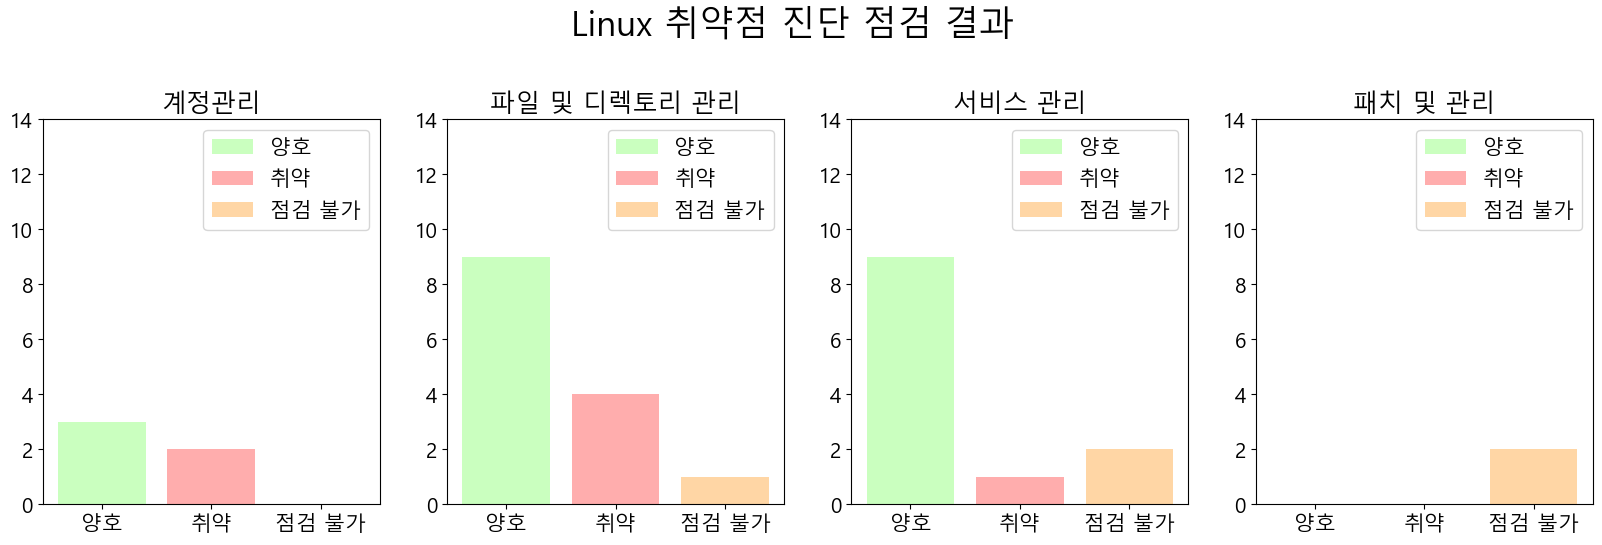

In [52]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import pandas as pd


df.fillna('점검 불가', inplace=True)
colors = ['#caffbf', '#ffadad', '#ffd6a5']
labels= ['양호', '취약', '점검 불가']

result1 = df[df['구분'] == '계정관리']['점검결과'].value_counts()
result1 = result1.reindex(['양호', '취약', '점검 불가'], fill_value=0)

result2 = df[df['구분'] == '파일 및 디렉토리 관리']['점검결과'].value_counts()
result2 = result2.reindex(['양호', '취약', '점검 불가'], fill_value=0)

result3 = df[df['구분'] == '서비스 관리']['점검결과'].value_counts()
result3 = result3.reindex(['양호', '취약', '점검 불가'], fill_value=0)

result4 = df[df['구분'] == '패치 및 로그관리']['점검결과'].value_counts()
result4 = result4.reindex(['양호', '취약', '점검 불가'], fill_value=0)

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].bar(result1.index, result1.values , color=colors , label=labels)
ax[0].set_title('계정관리')
ax[0].set_ylim([0,14])

ax[1].bar(result2.index, result2.values , color=colors , label=labels)
ax[1].set_title('파일 및 디렉토리 관리')
ax[1].set_ylim([0,14])

ax[2].bar(result3.index, result3.values , color=colors , label=labels)
ax[2].set_title('서비스 관리')
ax[2].set_ylim([0,14])

ax[3].bar(result4.index, result4.values , color=colors , label=labels)
ax[3].set_title('패치 및 관리')
ax[3].set_ylim([0,14])

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

fig.suptitle('Linux 취약점 진단 점검 결과', fontsize=25, y=1.1)

with PdfPages('메인제목적기.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

plt.show()


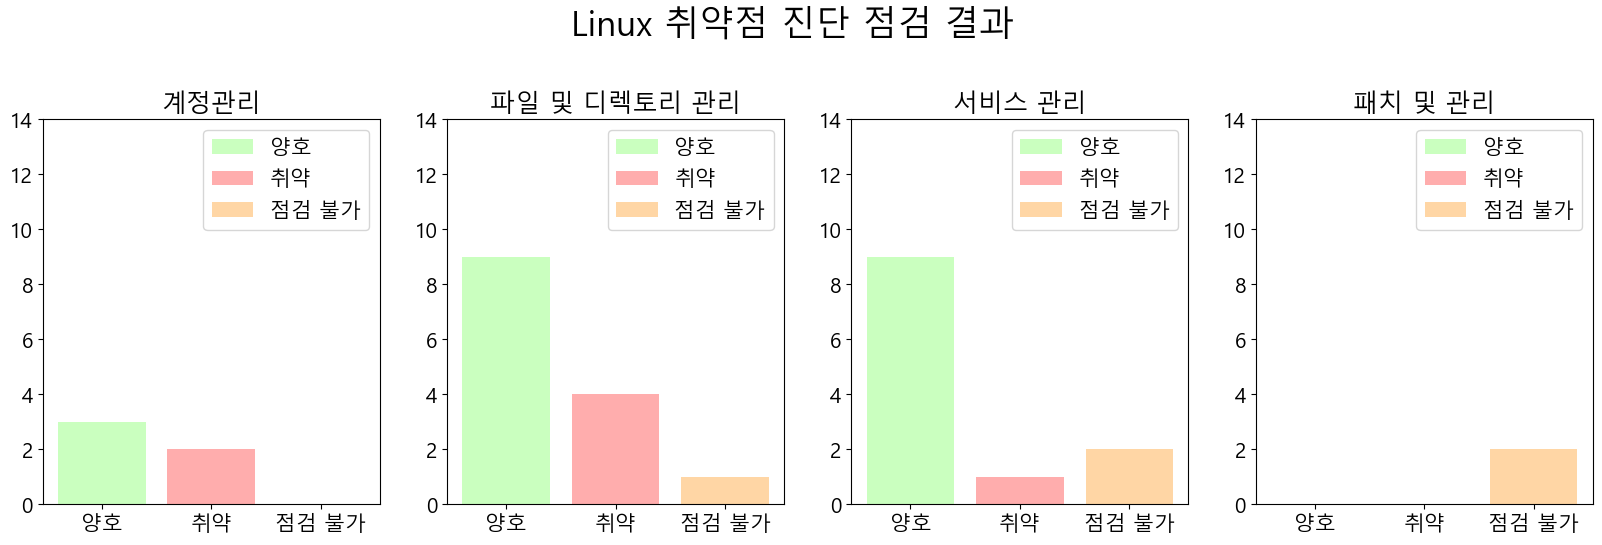

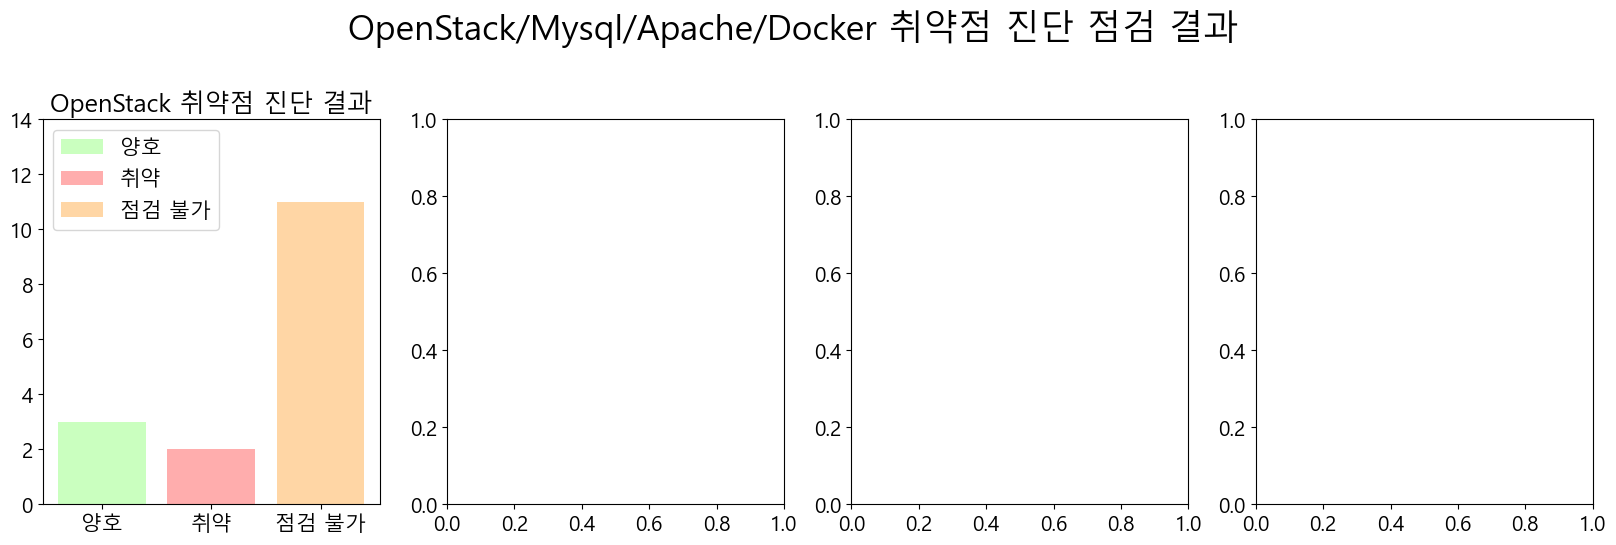

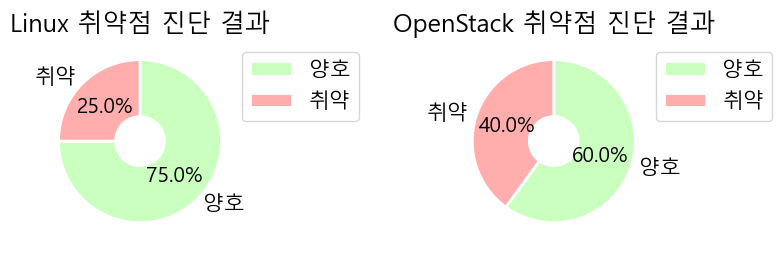

In [79]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import pandas as pd


df.fillna('점검 불가', inplace=True)
colors = ['#caffbf', '#ffadad', '#ffd6a5']
labels= ['양호', '취약', '점검 불가']

result1 = df[df['구분'] == '계정관리']['점검결과'].value_counts()
result1 = result1.reindex(['양호', '취약', '점검 불가'], fill_value=0)

result2 = df[df['구분'] == '파일 및 디렉토리 관리']['점검결과'].value_counts()
result2 = result2.reindex(['양호', '취약', '점검 불가'], fill_value=0)

result3 = df[df['구분'] == '서비스 관리']['점검결과'].value_counts()
result3 = result3.reindex(['양호', '취약', '점검 불가'], fill_value=0)

result4 = df[df['구분'] == '패치 및 로그관리']['점검결과'].value_counts()
result4 = result4.reindex(['양호', '취약', '점검 불가'], fill_value=0)

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].bar(result1.index, result1.values , color=colors , label=labels)
ax[0].set_title('계정관리')
ax[0].set_ylim([0,14])

ax[1].bar(result2.index, result2.values , color=colors , label=labels)
ax[1].set_title('파일 및 디렉토리 관리')
ax[1].set_ylim([0,14])

ax[2].bar(result3.index, result3.values , color=colors , label=labels)
ax[2].set_title('서비스 관리')
ax[2].set_ylim([0,14])

ax[3].bar(result4.index, result4.values , color=colors , label=labels)
ax[3].set_title('패치 및 관리')
ax[3].set_ylim([0,14])

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

fig.suptitle('Linux 취약점 진단 점검 결과', fontsize=25, y=1.1)

#----------------------------------------------------------------------- 오픈스택 막대 그래프

fig, bx = plt.subplots(1, 4, figsize=(20, 5))
dp.fillna('점검 불가', inplace=True)
# 색상 설정
colors = ['#caffbf', '#ffadad', '#ffd6a5']

labels= ['양호', '취약', '점검 불가']

    
op_result = dp[dp['구분'] == '보안설정']['점검결과'].value_counts()
op_result = op_result.reindex(['양호', '취약', '점검 불가'], fill_value=0)
    
    

    
bx[0].bar(op_result.index , op_result.values, color=colors , label=labels)
bx[0].set_title('OpenStack 취약점 진단 결과')
bx[0].set_ylim([0,14])
bx[0].legend()

fig.suptitle('OpenStack/Mysql/Apache/Docker 취약점 진단 점검 결과', fontsize=25, y=1.1)
#-------------------------------------------------------------------------원그래프

# subplot 생성
fig, (ax1, ax2) = plt.subplots(1, 2)

# 첫 번째 subplot에 그래프 그리기
result1 = df[df['점검결과'] == '양호']['점검결과'].count()
result2 = df[df['점검결과'] == '취약']['점검결과'].count()
colors = ['#caffbf', '#ffadad']
values = [result1, result2]
labels = ['양호', '취약']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
ax1.pie(values, labels=labels, autopct='%.1f%%', counterclock=False, colors=colors, startangle=90, wedgeprops=wedgeprops ,pctdistance=0.6)
ax1.set_title('Linux 취약점 진단 결과')
ax1.legend(loc=(1, 0.6))

# 두 번째 subplot에 그래프 그리기
op_good = dp[dp['점검결과'] == '양호']['점검결과'].count()
op_bad = dp[dp['점검결과'] == '취약']['점검결과'].count()
colors = ['#caffbf', '#ffadad']
values = [op_good, op_bad]
labels = ['양호', '취약']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
ax2.pie(values, labels=labels, autopct='%.1f%%', counterclock=False, colors=colors, startangle=90, wedgeprops=wedgeprops,pctdistance=0.6)
ax2.set_title('OpenStack 취약점 진단 결과')
ax2.legend(loc=(1, 0.6))

# subplot 간의 간격 조정
plt.tight_layout()
plt.subplots_adjust(right=1)





with PdfPages('메인제목적기111.pdf', 'a') as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    

plt.show()


# ★최종 초안

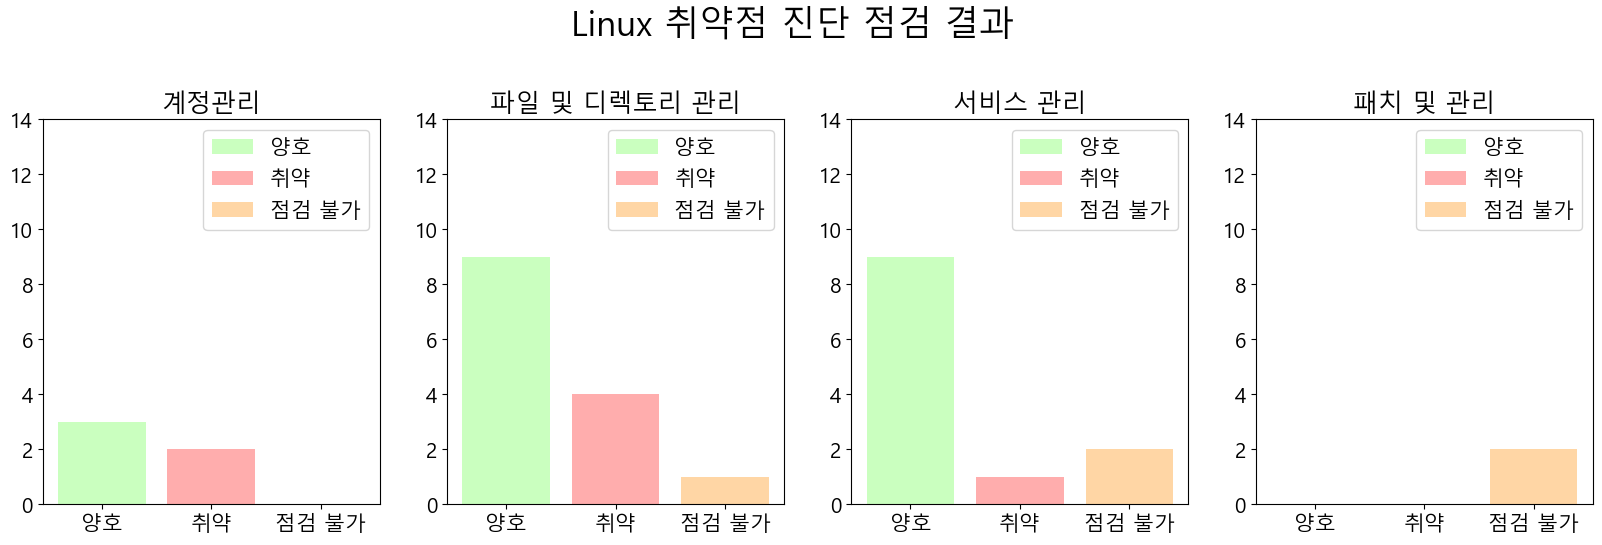

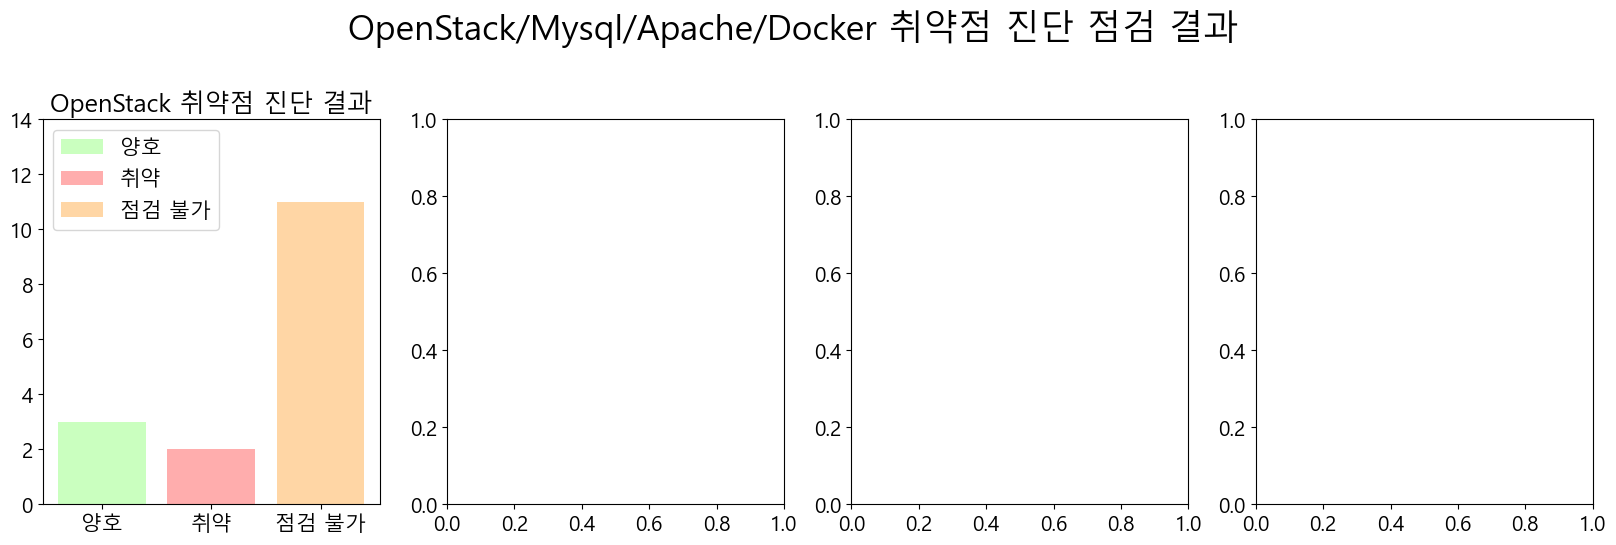

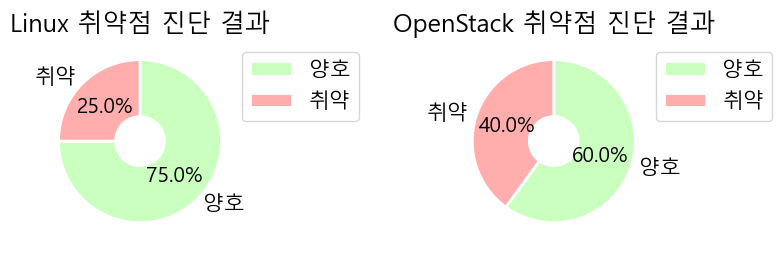

In [82]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import pandas as pd

with PdfPages('진단그래프 초안.pdf', 'a') as pdf:
    df.fillna('점검 불가', inplace=True)
    colors = ['#caffbf', '#ffadad', '#ffd6a5']
    labels= ['양호', '취약', '점검 불가']

    result1 = df[df['구분'] == '계정관리']['점검결과'].value_counts()
    result1 = result1.reindex(['양호', '취약', '점검 불가'], fill_value=0)

    result2 = df[df['구분'] == '파일 및 디렉토리 관리']['점검결과'].value_counts()
    result2 = result2.reindex(['양호', '취약', '점검 불가'], fill_value=0)
    
    result3 = df[df['구분'] == '서비스 관리']['점검결과'].value_counts()
    result3 = result3.reindex(['양호', '취약', '점검 불가'], fill_value=0)
    
    result4 = df[df['구분'] == '패치 및 로그관리']['점검결과'].value_counts()
    result4 = result4.reindex(['양호', '취약', '점검 불가'], fill_value=0)
    
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].bar(result1.index, result1.values , color=colors , label=labels)
    ax[0].set_title('계정관리')
    ax[0].set_ylim([0,14])
    
    ax[1].bar(result2.index, result2.values , color=colors , label=labels)
    ax[1].set_title('파일 및 디렉토리 관리')
    ax[1].set_ylim([0,14])
    
    ax[2].bar(result3.index, result3.values , color=colors , label=labels)
    ax[2].set_title('서비스 관리')
    ax[2].set_ylim([0,14])
    
    ax[3].bar(result4.index, result4.values , color=colors , label=labels)
    ax[3].set_title('패치 및 관리')
    ax[3].set_ylim([0,14])
    
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    ax[3].legend()
    
    fig.suptitle('Linux 취약점 진단 점검 결과', fontsize=25, y=1.1)
    pdf.savefig(fig, bbox_inches='tight')
    
    #----------------------------------------------------------------------- 오픈스택 막대 그래프
    
    fig, bx = plt.subplots(1, 4, figsize=(20, 5))
    dp.fillna('점검 불가', inplace=True)
    # 색상 설정
    colors = ['#caffbf', '#ffadad', '#ffd6a5']
    
    labels= ['양호', '취약', '점검 불가']
    
        
    op_result = dp[dp['구분'] == '보안설정']['점검결과'].value_counts()
    op_result = op_result.reindex(['양호', '취약', '점검 불가'], fill_value=0)
        
        
    
        
    bx[0].bar(op_result.index , op_result.values, color=colors , label=labels)
    bx[0].set_title('OpenStack 취약점 진단 결과')
    bx[0].set_ylim([0,14])
    bx[0].legend()
    
    fig.suptitle('OpenStack/Mysql/Apache/Docker 취약점 진단 점검 결과', fontsize=25, y=1.1)
    
    pdf.savefig(fig, bbox_inches='tight')
    #-------------------------------------------------------------------------원그래프
    
    # subplot 생성
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # 첫 번째 subplot에 그래프 그리기
    result1 = df[df['점검결과'] == '양호']['점검결과'].count()
    result2 = df[df['점검결과'] == '취약']['점검결과'].count()
    colors = ['#caffbf', '#ffadad']
    values = [result1, result2]
    labels = ['양호', '취약']
    wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
    ax1.pie(values, labels=labels, autopct='%.1f%%', counterclock=False, colors=colors, startangle=90, wedgeprops=wedgeprops ,pctdistance=0.6)
    ax1.set_title('Linux 취약점 진단 결과')
    ax1.legend(loc=(1, 0.6))
    
    # 두 번째 subplot에 그래프 그리기
    op_good = dp[dp['점검결과'] == '양호']['점검결과'].count()
    op_bad = dp[dp['점검결과'] == '취약']['점검결과'].count()
    colors = ['#caffbf', '#ffadad']
    values = [op_good, op_bad]
    labels = ['양호', '취약']
    wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
    ax2.pie(values, labels=labels, autopct='%.1f%%', counterclock=False, colors=colors, startangle=90, wedgeprops=wedgeprops,pctdistance=0.6)
    ax2.set_title('OpenStack 취약점 진단 결과')
    ax2.legend(loc=(1, 0.6))
    
    # subplot 간의 간격 조정
    plt.tight_layout()
    plt.subplots_adjust(right=1)
    





    pdf.savefig(fig, bbox_inches='tight')
    

plt.show()
